<a href="https://colab.research.google.com/github/FayElhassan/Double_Descent_Phenomenan/blob/main/Project_Double_Descent_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DOUBLE DESCENT 



Double descent refers to the phenomenon where the test error first decreases, reaches a minimum, and then increases as the model complexity (i.e., the number of features or the number of model parameters) increases beyond a certain threshold. This phenomenon can occur even when the number of training samples is much larger than the number of model parameters. The code investigates whether this phenomenon occurs for the synthetic dataset used, and whether the regularization parameter affects the shape of the test error curve.

#Import Libaries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#Generate Data 

In [ ]:
# Generate synthetic data
np.random.seed(42)
n_samples = 200
n_features = 1000
X = np.random.normal(size=(n_samples, n_features))
noise = np.random.normal(size=(n_samples))
w_true = np.random.uniform(-1, 1, size=(n_features))
y = X.dot(w_true) + noise


#Data Split

In [ ]:
def train_test_split(X, y, test_size=0.2,random_state=42):
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    indices = np.random.permutation(n_samples)
    X_shuffle, y_shuffle = X[indices], y[indices]
    X_train, y_train = X_shuffle[:-n_test], y_shuffle[:-n_test]
    X_test, y_test = X_shuffle[-n_test:], y_shuffle[-n_test:]
    return X_train, X_test, y_train, y_test


In [ ]:
X = np.hstack((X, np.random.normal(size=(n_samples, n_features))))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 2000), (40, 2000), (160,), (40,))

#Linear Regression Function

In [ ]:
class LinearRegression:
    def __init__(self, lr=0.01, num_iters=1000):
        self.lr = lr
        self.num_iters = num_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.num_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [ ]:
# Compute train and test errors for different model complexities
complexities = np.arange(1, n_features + 1, 10)
train_errors = []
test_errors = []
for complexity in complexities:
    # Fit a linear regression model
    lr = LinearRegression()
    lr.fit(X_train[:, :2*complexity], y_train)
    
    # Compute train and test errors
    y_train_pred = lr.predict(X_train[:, :2*complexity])
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)
    
    y_test_pred = lr.predict(X_test[:, :2*complexity])
    test_error = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_error)

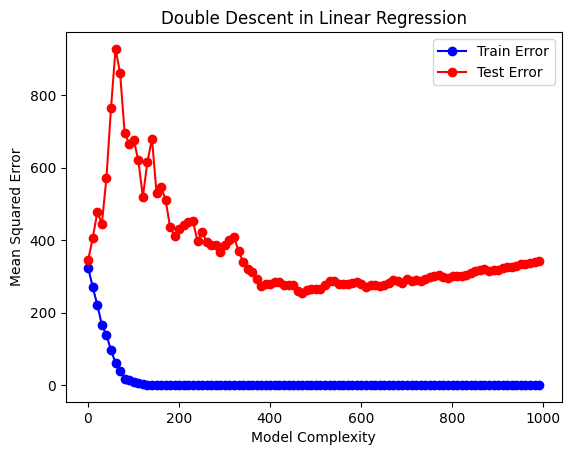

In [ ]:
# Plot train and test errors against model complexity
fig, ax = plt.subplots()
ax.plot(complexities, train_errors, 'bo-', label='Train Error')
ax.plot(complexities, test_errors, 'ro-', label='Test Error')
ax.set_xlabel('Model Complexity')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Double Descent in Linear Regression')
ax.legend()
plt.show()

#Generate Data for regularized Linear Regression 

In [ ]:
# Set the seed for reproducibility
np.random.seed(42)

# Define the dataset parameters
d = 500
alpha = 0.0001

# Define the training set sizes to use
train_n_values = np.arange(10, 2*d+1, 10)

# Define the number of times to repeat each experiment
n_repeats = 10

# Define the size of the test set
test_n = 1000

# Define arrays to store the test and train errors
test_errors = np.zeros((len(train_n_values), n_repeats))
train_errors = np.zeros((len(train_n_values), n_repeats))

# Generate the full dataset and the true coefficients
X_full = np.random.normal(0, 1, size=(2*d, d))
a_true = np.random.normal(0, 1, size=(d, 1))
y_full = np.sign(X_full.dot(a_true))


#Define our Function


Regularized linear regression solution:
a = (X⊤X + λI)X⊤y

To investigate the relationship between the model complexity (controlled by the number of features d and the regularization parameter λ) and the generalization error (measured by the test error) on a fixed size of training data. By varying the values of d and λ and observing the resulting test errors

In [ ]:
# Compute the linear regression solution for the full dataset
XTX = X_full.T.dot(X_full)
a_full = np.linalg.solve(XTX + alpha*np.eye(d), X_full.T.dot(y_full))

# For each training set size, repeat the experiment n_repeats times
for j, train_n in enumerate(train_n_values):
    for k in range(n_repeats):
        # Generate the training set
        X_train = X_full[:train_n]
        y_train = y_full[:train_n]

        # Compute the linear regression solution for the training set
        XTX = X_train.T.dot(X_train)
        a = np.linalg.solve(XTX + alpha*np.eye(d), X_train.T.dot(y_train))

        # Generate the test set
        X_test = np.random.normal(0, 1, size=(test_n, d))
        y_test = np.sign(X_test.dot(a_true))

        # Compute the test error
        y_pred = np.sign(X_test.dot(a))
        test_errors[j, k] = np.mean(y_pred != y_test)

        # Compute the train error
        y_train_pred = np.sign(X_train.dot(a))
        train_errors[j, k] = np.mean(y_train_pred != y_train)




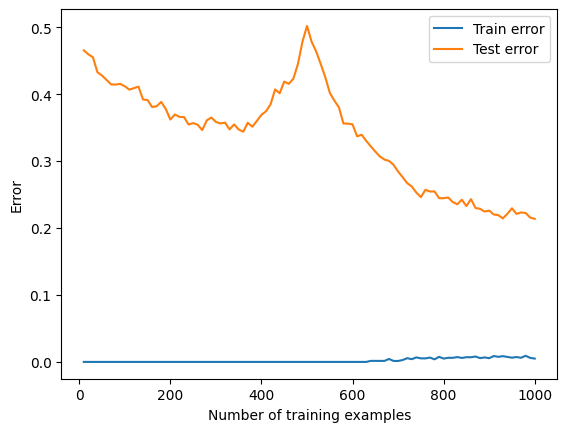

In [ ]:
# Compute the mean test and train errors over the repeats
mean_test_errors = np.mean(test_errors, axis=1)
mean_train_errors = np.mean(train_errors, axis=1)

# Plot the train and test errors

plt.plot(train_n_values, mean_train_errors, label='Train error')
plt.errorbar(train_n_values, mean_test_errors,  label='Test error')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.show()

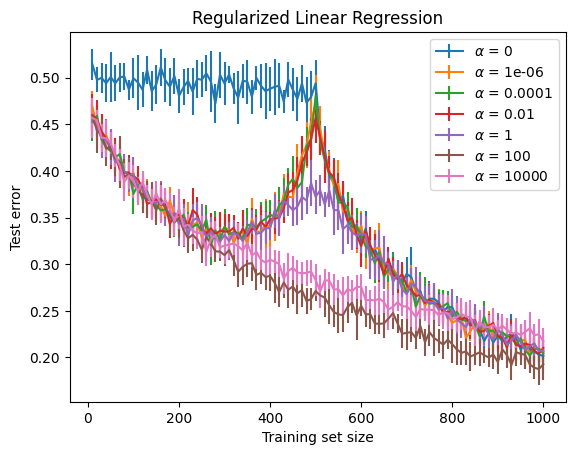

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Set the random seed for reproducibility
# np.random.seed(42)

# # Set up the parameters
# d = 500 # Number of features
# n_repeats = 10 # Number of times to repeat each experiment
# train_n_values = np.arange(10, 2*d+1, 10) # Different values of training set size to use
alpha_values = [0, 0.000001, 0.0001, 0.01, 1, 100, 10000] # Different values of regularization parameter to use

# Create an array to store the test errors
test_errors = np.zeros((len(alpha_values), len(train_n_values), n_repeats))

# Loop over different values of the regularization parameter and training set size
for i, alpha in enumerate(alpha_values):
    for j, train_n in enumerate(train_n_values):
        for k in range(n_repeats):
            # Generate training data
            X_train = np.random.normal(0,1, size=(train_n,d)) # Generate training data with normal distribution
            a_true = np.random.normal(0,1, size=(d,1)) # Generate true values of a with normal distribution
            y_train = np.sign(X_train.dot(a_true)) # Generate labels for training data based on the true values of a

            # Compute the regularized linear regression solution
            A = np.dot(X_train.T, X_train) + alpha * np.eye(d) #
            B = np.dot(X_train.T, y_train) 
            a = np.linalg.solve(A, B) 

            # Generate test data
            test_n = 1000 # Set the number of data points in the test set
            X_test = np.random.normal(0,1, size=(test_n,d)) # Generate test data with normal distribution
            y_test = np.sign(X_test.dot(a_true)) # Generate labels for test data based on the true values of a

            # Compute the test error
            y_pred = np.sign(X_test.dot(a)) # Compute predicted labels for test data based on values of a computed from training data
            test_error = np.mean(y_pred != y_test) # Compute test error as the fraction of misclassified data points
            test_errors[i,j,k] = test_error # Store the test error

# Compute the mean and standard deviation of the test errors over the repeats
mean_test_errors = np.mean(test_errors, axis=2) # Compute the mean test error over the repeats
std_test_errors = np.std(test_errors, axis=2) # Compute the standard deviation of the test error over the repeats

# Plot the results
for i, alpha in enumerate(alpha_values):
    plt.errorbar(train_n_values, mean_test_errors[i], yerr=std_test_errors[i], label=r'$\alpha$ = {}'.format(alpha))
plt.xlabel('Training set size')
plt.ylabel('Test error')
plt.title('Regularized Linear Regression')
plt.legend()
plt.show()


When λ is small, the regularization is weak and the model tends to fit the training data more closely, possibly leading to overfitting. When λ is large, the regularization is strong and the model tends to have smaller coefficients, which can help prevent overfitting